In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/agorina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/agorina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/agorina/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [69]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer 

In [2]:
df = pd.read_csv('/Users/agorina/Desktop/Flatiron/all_ingredients_ddna.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
df.head()

,Ingredients,Cuisine
0,"1 pound pork butt, cut into 1 inch cubes 1 tea...",1
1,"1 pound flank steak, thinly sliced 5 tablespoo...",1
2,"4 cups chicken broth, divided 1/8 teaspoon gro...",1
3,"1 1/2 pounds beef top sirloin, thinly sliced 1...",1
4,1 pound round steak 4 tablespoons soy sauce 4 ...,1


In [4]:
df.shape

(181, 2)

In [9]:
from nltk.tokenize import RegexpTokenizer

In [9]:
test_rec = df.loc['0': 'Ingredients']

In [11]:
test_string = '1 pound pork butt, cut into 1 inch cubes 1 teaspoon salt 1/4 teaspoon white sugar 1 teaspoon soy sauce 1 egg white 2 green onions, chopped 1 quart vegetable oil for frying 1/2 cup cornstarch 1 tablespoon vegetable oil 3 stalks celery, cut into 1/2 inch pieces 1 medium green bell pepper, cut into 1 inch pieces 1 medium onion, cut into wedges white sugar to taste salt to taste 1 cup water 1/4 teaspoon salt 3/4 cup white sugar 1/3 cup apple cider vinegar 1/4 cup ketchup 1/2 teaspoon soy sauce 1 (8 ounce) can pineapple chunks, undrained 2 tablespoons cornstarch 1/4 cup water Add all ingredients to list'

In [12]:
test_string

'1 pound pork butt, cut into 1 inch cubes 1 teaspoon salt 1/4 teaspoon white sugar 1 teaspoon soy sauce 1 egg white 2 green onions, chopped 1 quart vegetable oil for frying 1/2 cup cornstarch 1 tablespoon vegetable oil 3 stalks celery, cut into 1/2 inch pieces 1 medium green bell pepper, cut into 1 inch pieces 1 medium onion, cut into wedges white sugar to taste salt to taste 1 cup water 1/4 teaspoon salt 3/4 cup white sugar 1/3 cup apple cider vinegar 1/4 cup ketchup 1/2 teaspoon soy sauce 1 (8 ounce) can pineapple chunks, undrained 2 tablespoons cornstarch 1/4 cup water Add all ingredients to list'

In [17]:
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')
tokenized_string = tokenizer.tokenize(test_string)
tokenized_string

['1',
 'pound',
 'pork',
 'butt',
 'cut',
 'into',
 '1',
 'inch',
 'cubes',
 '1',
 'teaspoon',
 'salt',
 '1',
 '4',
 'teaspoon',
 'white',
 'sugar',
 '1',
 'teaspoon',
 'soy',
 'sauce',
 '1',
 'egg',
 'white',
 '2',
 'green',
 'onions',
 'chopped',
 '1',
 'quart',
 'vegetable',
 'oil',
 'for',
 'frying',
 '1',
 '2',
 'cup',
 'cornstarch',
 '1',
 'tablespoon',
 'vegetable',
 'oil',
 '3',
 'stalks',
 'celery',
 'cut',
 'into',
 '1',
 '2',
 'inch',
 'pieces',
 '1',
 'medium',
 'green',
 'bell',
 'pepper',
 'cut',
 'into',
 '1',
 'inch',
 'pieces',
 '1',
 'medium',
 'onion',
 'cut',
 'into',
 'wedges',
 'white',
 'sugar',
 'to',
 'taste',
 'salt',
 'to',
 'taste',
 '1',
 'cup',
 'water',
 '1',
 '4',
 'teaspoon',
 'salt',
 '3',
 '4',
 'cup',
 'white',
 'sugar',
 '1',
 '3',
 'cup',
 'apple',
 'cider',
 'vinegar',
 '1',
 '4',
 'cup',
 'ketchup',
 '1',
 '2',
 'teaspoon',
 'soy',
 'sauce',
 '1',
 '8',
 'ounce',
 'can',
 'pineapple',
 'chunks',
 'undrained',
 '2',
 'tablespoons',
 'cornstarch',


In [18]:
def filtered(string):
    stop_words=set(stopwords.words("english"))
    filtered_string = [word for word in string if word not in stop_words]
    
    return filtered_string

In [20]:
filtered_string = filtered(tokenized_string)

In [21]:
print(len(tokenized_string))
print(len(filtered_string))

120
110


In [22]:
def lower(string):
    lowered_string = [word.lower() for word in string]
    return lowered_string

In [23]:
lowered_string = lower(filtered_string)

In [24]:
lowered_string

['1',
 'pound',
 'pork',
 'butt',
 'cut',
 '1',
 'inch',
 'cubes',
 '1',
 'teaspoon',
 'salt',
 '1',
 '4',
 'teaspoon',
 'white',
 'sugar',
 '1',
 'teaspoon',
 'soy',
 'sauce',
 '1',
 'egg',
 'white',
 '2',
 'green',
 'onions',
 'chopped',
 '1',
 'quart',
 'vegetable',
 'oil',
 'frying',
 '1',
 '2',
 'cup',
 'cornstarch',
 '1',
 'tablespoon',
 'vegetable',
 'oil',
 '3',
 'stalks',
 'celery',
 'cut',
 '1',
 '2',
 'inch',
 'pieces',
 '1',
 'medium',
 'green',
 'bell',
 'pepper',
 'cut',
 '1',
 'inch',
 'pieces',
 '1',
 'medium',
 'onion',
 'cut',
 'wedges',
 'white',
 'sugar',
 'taste',
 'salt',
 'taste',
 '1',
 'cup',
 'water',
 '1',
 '4',
 'teaspoon',
 'salt',
 '3',
 '4',
 'cup',
 'white',
 'sugar',
 '1',
 '3',
 'cup',
 'apple',
 'cider',
 'vinegar',
 '1',
 '4',
 'cup',
 'ketchup',
 '1',
 '2',
 'teaspoon',
 'soy',
 'sauce',
 '1',
 '8',
 'ounce',
 'pineapple',
 'chunks',
 'undrained',
 '2',
 'tablespoons',
 'cornstarch',
 '1',
 '4',
 'cup',
 'water',
 'add',
 'ingredients',
 'list']

In [32]:
def custom_stop(string):
    custom_stop_words = ['1','2', '3', '4', '5', '6', '7', '8', '9', 'inch', 'ounce', 'pound', 'teaspoon', 'tablespoon', 'cup', 'small', 'medium', 'large']
    cleaned_string = [word for word in string if word not in custom_stop_words]
    
    return cleaned_string #len(cleaned_string)

In [35]:
cleaned_string = custom_stop(lowered_string)
cleaned_string

['pork',
 'butt',
 'cut',
 'cubes',
 'salt',
 'white',
 'sugar',
 'soy',
 'sauce',
 'egg',
 'white',
 'green',
 'onions',
 'chopped',
 'quart',
 'vegetable',
 'oil',
 'frying',
 'cornstarch',
 'vegetable',
 'oil',
 'stalks',
 'celery',
 'cut',
 'pieces',
 'green',
 'bell',
 'pepper',
 'cut',
 'pieces',
 'onion',
 'cut',
 'wedges',
 'white',
 'sugar',
 'taste',
 'salt',
 'taste',
 'water',
 'salt',
 'white',
 'sugar',
 'apple',
 'cider',
 'vinegar',
 'ketchup',
 'soy',
 'sauce',
 'pineapple',
 'chunks',
 'undrained',
 'tablespoons',
 'cornstarch',
 'water',
 'add',
 'ingredients',
 'list']

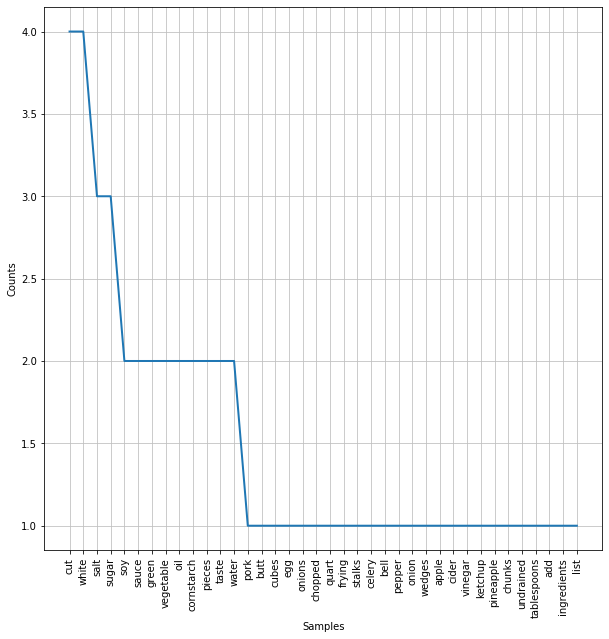

In [36]:
fdist = FreqDist(cleaned_string)
plt.figure(figsize=(10,10))
fdist.plot()

In [74]:
def clean_strings(string):
    #tokenize
    tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
    tokenized_string = tokenizer.tokenize(string)
    
    #lower
    lowered_string = [word.lower() for word in tokenized_string]
    
    #lemmatization
    lemmatizer = WordNetLemmatizer() 
    lemmatized_string = [lemmatizer.lemmatize(word) for word in lowered_string]
    
    #filter stop words
    stop_words=set(stopwords.words("english"))
    filtered_string = [word for word in lemmatized_string if word not in stop_words]
   
    #remove custom stop words
    custom_stop_words = ['inch', 'ounce', 'pound', 'teaspoon', 'tablespoon', 'cup', 'small', 'medium', 'large']
    cleaned_string = [word for word in filtered_string if word not in custom_stop_words]
    
    return cleaned_string

In [75]:
new_test_string = '1 1/2 pounds beef top sirloin, thinly sliced 1/3 cup white sugar 1/3 cup rice wine vinegar 2 tablespoons frozen orange juice concentrate 1 teaspoon salt 1 tablespoon soy sauce 1 cup long grain rice 2 cups water 1/4 cup cornstarch 2 teaspoons orange zest 3 tablespoons grated fresh ginger 1 1/2 tablespoons minced garlic 8 broccoli florets, lightly steamed or blanched 2 cups oil for frying Add all ingredients to list'
cleaned_new_string = clean_strings(new_test_string)

In [76]:
cleaned_new_string

['beef',
 'top',
 'sirloin',
 'thinly',
 'sliced',
 'white',
 'sugar',
 'rice',
 'wine',
 'vinegar',
 'frozen',
 'orange',
 'juice',
 'concentrate',
 'salt',
 'soy',
 'sauce',
 'long',
 'grain',
 'rice',
 'water',
 'cornstarch',
 'orange',
 'zest',
 'grated',
 'fresh',
 'ginger',
 'minced',
 'garlic',
 'broccoli',
 'floret',
 'lightly',
 'steamed',
 'blanched',
 'oil',
 'frying',
 'add',
 'ingredient',
 'list']

In [77]:
def plot_word_dist(string):
    fdist = FreqDist(string)
    plt.figure(figsize=(10,10))
    fdist.plot()

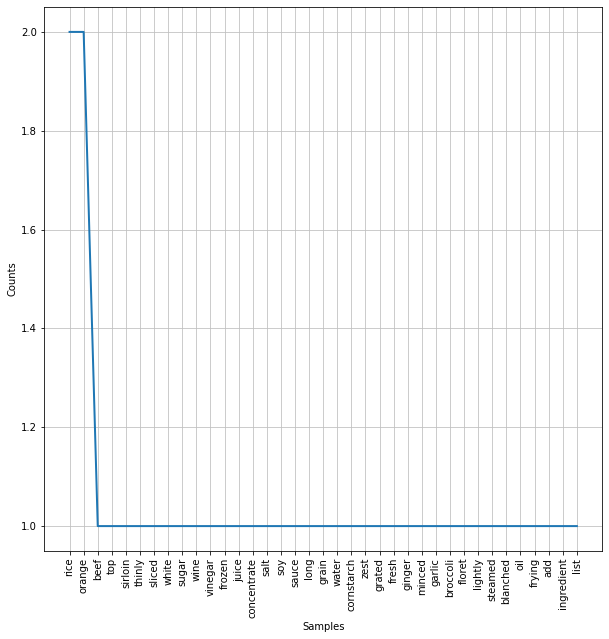

In [78]:
plot_word_dist(cleaned_new_string)

In [79]:
mexican_string = '1 onion, peeled and halved3 cups dry pinto beans, rinsed1/2 fresh jalapeno pepper, seeded and chopped2 tablespoons minced garlic5 teaspoons salt1 3/4 teaspoons fresh ground black pepper1/8 teaspoon ground cumin, optional9 cups waterAdd all ingredients to list'
mexican_string

'1 onion, peeled and halved3 cups dry pinto beans, rinsed1/2 fresh jalapeno pepper, seeded and chopped2 tablespoons minced garlic5 teaspoons salt1 3/4 teaspoons fresh ground black pepper1/8 teaspoon ground cumin, optional9 cups waterAdd all ingredients to list'

In [80]:
cleaned_mexican_string = clean_strings(mexican_string)
cleaned_mexican_string

['onion',
 'peeled',
 'halved',
 'dry',
 'pinto',
 'bean',
 'rinsed',
 'fresh',
 'jalapeno',
 'pepper',
 'seeded',
 'chopped',
 'minced',
 'garlic',
 'salt',
 'fresh',
 'ground',
 'black',
 'pepper',
 'ground',
 'cumin',
 'optional',
 'wateradd',
 'ingredient',
 'list']

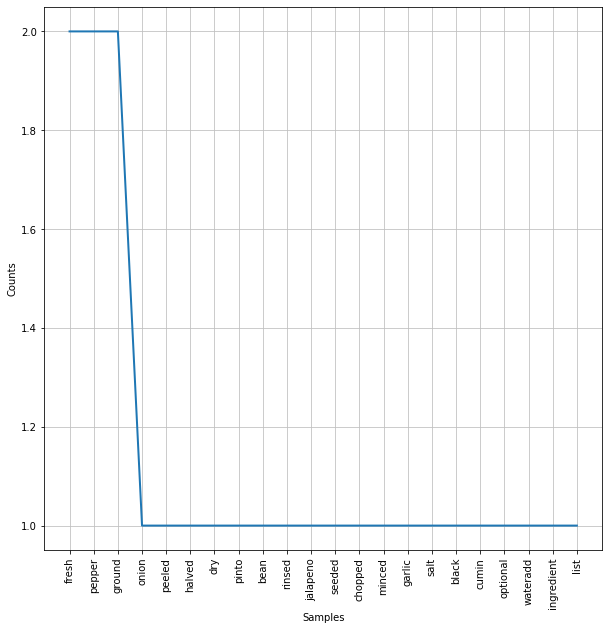

In [81]:
plot_word_dist(cleaned_mexican_string)

In [ ]:
bbc_df = pd.read_csv('/Users/agorina/Desktop/Flatiron/recipes_nlp/overall_bbc.csv')

In [85]:
bbc_df.rename(columns={'recipe': 'Ingredients', 'type': 'Cuisine'}, inplace=True)
#df.rename(columns={"A": "a", "B": "c"})

In [86]:
bbc_df.head()

,Ingredients,Cuisine
0,25cm/10in sponge (cut from a large bought flan...,6
1,500g/1lb 2oz sausagemeat 450g/1lb self-raising...,6
2,450g/1lb self-raising flour 1 tsp baking powde...,6
3,175g/6oz plain flour 1 tsp baking powder 25g/1...,6
4,125g/4½oz plain flour 300g/10½oz caster sugar ...,6


In [88]:
frames = [bbc_df, df]
bigdf = pd.concat(frames, ignore_index=True)

In [89]:
df.shape

(2413, 2)

In [91]:
ddf = bigdf.drop_duplicates('Ingredients')
ddf.shape

(2413, 2)

In [92]:
ddf.to_csv( '/Users/agorina/Desktop/Flatiron/big_dataframe.csv')

,Ingredients,Cuisine
0,25cm/10in sponge (cut from a large bought flan...,6
1,500g/1lb 2oz sausagemeat 450g/1lb self-raising...,6
2,450g/1lb self-raising flour 1 tsp baking powde...,6
3,175g/6oz plain flour 1 tsp baking powder 25g/1...,6
4,125g/4½oz plain flour 300g/10½oz caster sugar ...,6


In [93]:
ddf['Cuisine'].value_counts()

7     454
3     436
5     367
9     299
6     254
8     157
2     138
11    128
4      86
1      32
10     32
12     30
Name: Cuisine, dtype: int64

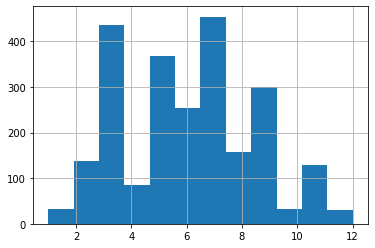

In [95]:
ddf['Cuisine'].hist(bins=12)

In [96]:
ddf = ddf[(ddf.Cuisine != 4) & (ddf.Cuisine != 1) & (ddf.Cuisine != 10) & (ddf.Cuisine != 12)]

In [98]:
ddf.shape

(2233, 2)

In [99]:
ddf.to_csv(f'/Users/agorina/Desktop/Flatiron/bigdatasetrecipes.csv')

In [102]:
ddf.dropna(axis=0, inplace=True)

/Users/agorina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [103]:
def clean_strings(string):
    #tokenize
    tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
    tokenized_string = tokenizer.tokenize(string)
    
    #lower
    lowered_string = [word.lower() for word in tokenized_string]
    
    #lemmatization
    lemmatizer = WordNetLemmatizer() 
    lemmatized_string = [lemmatizer.lemmatize(word) for word in lowered_string]
    
    #filter stop words
    stop_words=set(stopwords.words("english"))
    filtered_string = [word for word in lemmatized_string if word not in stop_words]
   
    #remove custom stop words
    custom_stop_words = ['inch', 'ounce', 'pound', 'teaspoon', 'tablespoon', 'cup', 'small', 'medium', 'large']
    cleaned_string = [word for word in filtered_string if word not in custom_stop_words]
    
    return cleaned_string

In [104]:
ddf['Ingredients'] = ddf.apply(lambda row: clean_strings(row['Ingredients']), axis=1)

/Users/agorina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [109]:
ddf.Cuisine.value_counts()

7     454
3     436
5     367
9     299
6     254
8     157
2     137
11    128
Name: Cuisine, dtype: int64

In [110]:
ddf.shape

(2232, 2)

In [112]:
ddf

,Ingredients,Cuisine
0,"[cm, sponge, cut, bought, flan, case, g, oz, c...",6
1,"[g, lb, oz, sausagemeat, g, lb, self, raising,...",6
2,"[g, lb, self, raising, flour, tsp, baking, pow...",6
3,"[g, oz, plain, flour, tsp, baking, powder, g, ...",6
4,"[g, oz, plain, flour, g, oz, caster, sugar, fr...",6
...,...,...
4640,"[black, bean, drained, rinsed, green, bell, pe...",6
4641,"[bag, coleslaw, mix, diced, onion, creamy, sal...",6
4642,"[warm, water, degree, f, degree, c, warm, milk...",6
4643,"[sweet, potato, butter, softened, white, sugar...",6


In [115]:
for value in ddf['Ingredients']:
    ' '.join(value)

In [117]:
ddf['Ingredients'] = ddf.apply(lambda row: ' '.join(row['Ingredients']), axis=1)

/Users/agorina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [118]:
ddf

,Ingredients,Cuisine
0,cm sponge cut bought flan case g oz caster sug...,6
1,g lb oz sausagemeat g lb self raising flour ts...,6
2,g lb self raising flour tsp baking powder tsp ...,6
3,g oz plain flour tsp baking powder g oz caster...,6
4,g oz plain flour g oz caster sugar free range ...,6
...,...,...
4640,black bean drained rinsed green bell pepper cu...,6
4641,bag coleslaw mix diced onion creamy salad dres...,6
4642,warm water degree f degree c warm milk egg but...,6
4643,sweet potato butter softened white sugar milk ...,6


In [122]:
def filter_stop(string):
    stop = ['oz', 'lb', 'lbs', 'g', 'kg', 'gram', 'cm']
    lst = [word for word in string if word not in stop]
    new_st = ' '.join(lst)
    return new_st

In [120]:
ddf['Ingredients'] = ddf.apply(lambda row: filter_stop(row['Ingredients']), axis=1)

/Users/agorina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [123]:
ddf

,Ingredients,Cuisine
0,None,6
1,None,6
2,None,6
3,None,6
4,None,6
...,...,...
4640,None,6
4641,None,6
4642,None,6
4643,None,6
